In [2]:
import itertools
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data = tf.keras.datasets.mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data
train_images = train_images / np.float32(255)
test_images = test_images / np.float32(255)

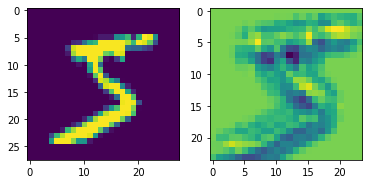

In [4]:
layer = tf.keras.layers.Conv2D(filters=1, kernel_size=5)
x = train_images[0]
x = tf.reshape(x, (1, 28, 28, 1))
y = layer(x)
x = tf.reshape(x, (28, 28))
y = tf.reshape(y, (24, 24))
plt.subplot(1, 2, 1)
plt.imshow(x)
plt.subplot(1, 2, 2)
plt.imshow(y)

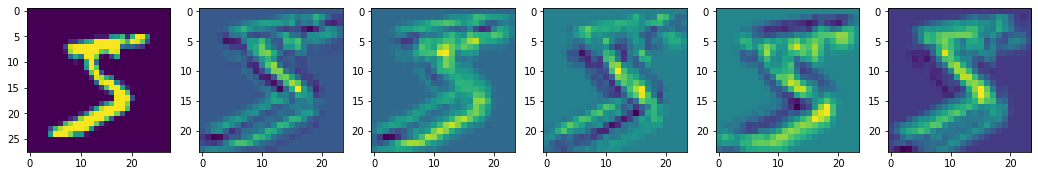

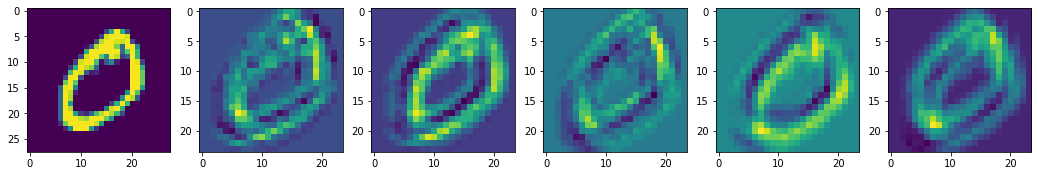

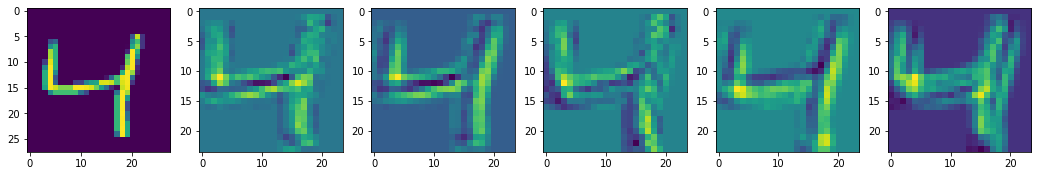

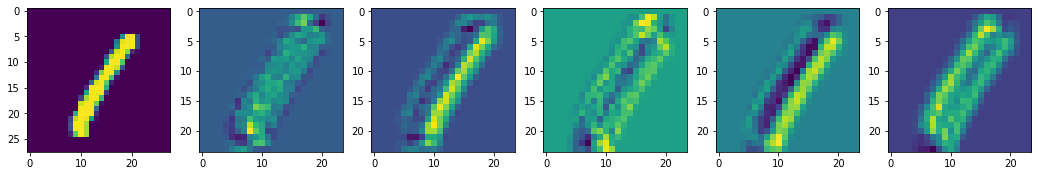

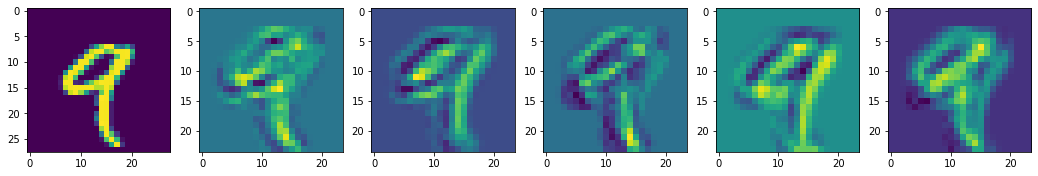

In [5]:
layers = [tf.keras.layers.Conv2D(filters=1, kernel_size=5) for _ in range(5)]
def play(x):
    x = tf.reshape(x, (1, 28, 28, 1))
    y = [layer(x) for layer in layers]
    x = tf.reshape(x, (28, 28))
    y = [tf.reshape(_y, (24, 24)) for _y in y]
    plt.figure(figsize=(18, 4))
    plt.subplot(1, 6, 1)
    plt.imshow(x)
    for i in range(5):
        plt.subplot(1, 6, i + 2)
        plt.imshow(y[i])
    plt.show()

for image in train_images[:5]:
    play(image)

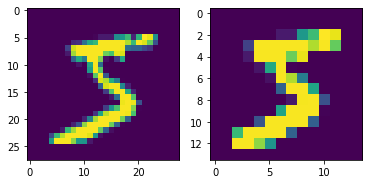

In [6]:
layer = tf.keras.layers.MaxPool2D(2)
x = train_images[0]
x = tf.reshape(x, (1, 28, 28, 1))
y = layer(x)
x = tf.reshape(x, (28, 28))
y = tf.reshape(y, (14, 14))
plt.subplot(1, 2, 1)
plt.imshow(x)
plt.subplot(1, 2, 2)
plt.imshow(y)

In [7]:
L = tf.keras.layers
def create_model():
    model = tf.keras.Sequential([
        L.Reshape((28, 28, 1), input_shape=(28, 28)),
        L.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        L.MaxPool2D((2, 2)),
        L.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        L.MaxPool2D((2, 2)),
        L.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        L.Flatten(),
        L.Dense(64, activation='relu'),
        L.Dense(10, activation='softmax'),
    ])
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [8]:
model.fit(train_images, train_labels, epochs=10,
          validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 257us/sample - loss: 0.1598 - accuracy: 0.9511 - val_loss: 0.0486 - val_accuracy: 0.9835
Epoch 2/10
60000/60000 [==============================] - 16s 261us/sample - loss: 0.0492 - accuracy: 0.9849 - val_loss: 0.0369 - val_accuracy: 0.9873
Epoch 3/10
60000/60000 [==============================] - 16s 273us/sample - loss: 0.0341 - accuracy: 0.9893 - val_loss: 0.0290 - val_accuracy: 0.9908
Epoch 4/10
60000/60000 [==============================] - 16s 270us/sample - loss: 0.0265 - accuracy: 0.9914 - val_loss: 0.0341 - val_accuracy: 0.9900
Epoch 5/10
60000/60000 [==============================] - 16s 264us/sample - loss: 0.0205 - accuracy: 0.9933 - val_loss: 0.0281 - val_accuracy: 0.9901
Epoch 6/10
60000/60000 [==============================] - 16s 264us/sample - loss: 0.0161 - accuracy: 0.9948 - val_loss: 0.0271 - val_accuracy: 0.9924
Epoch 7/10
60000/60000 [====================

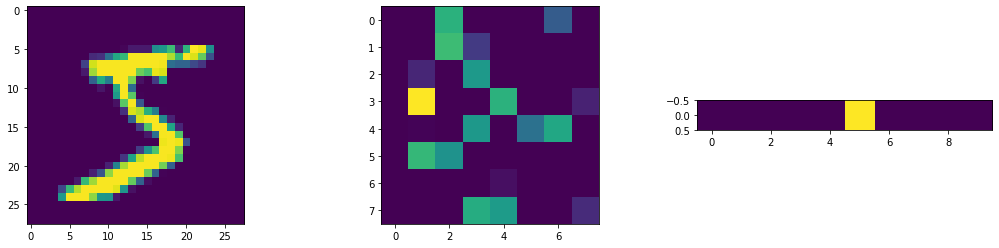

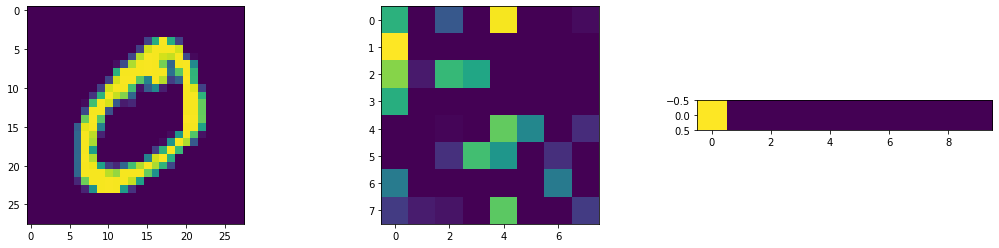

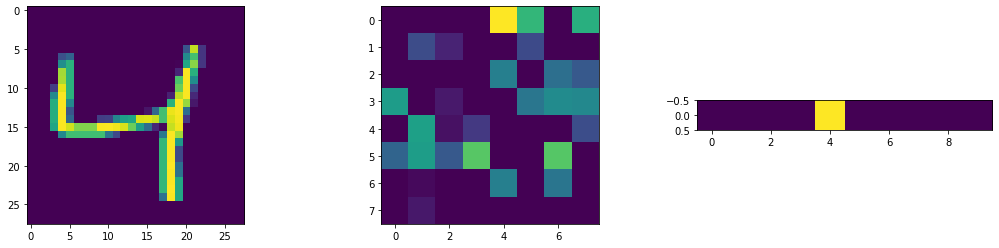

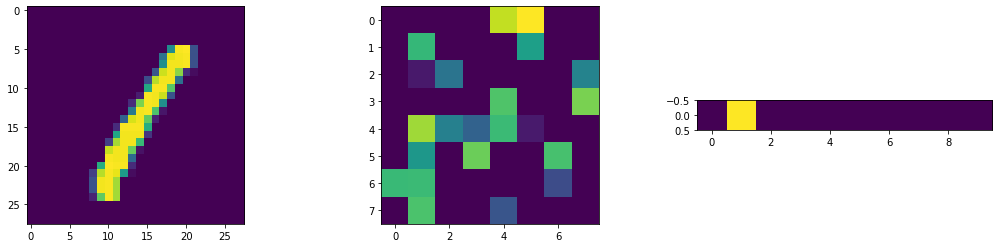

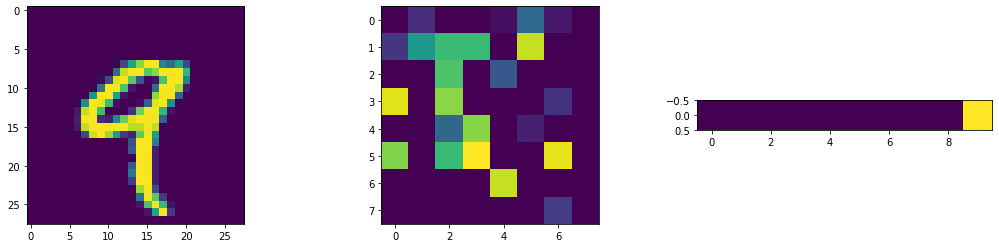

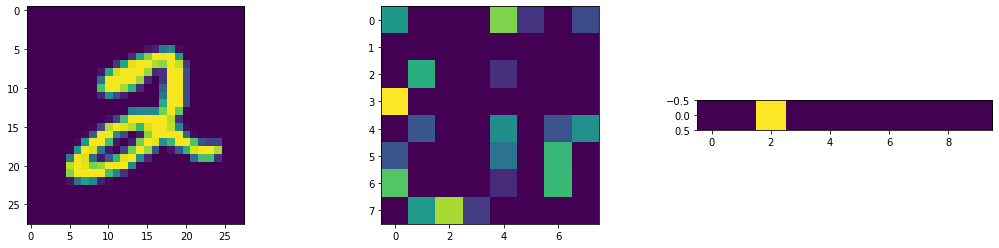

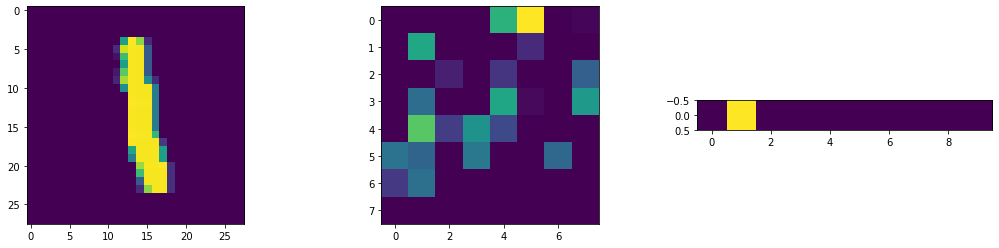

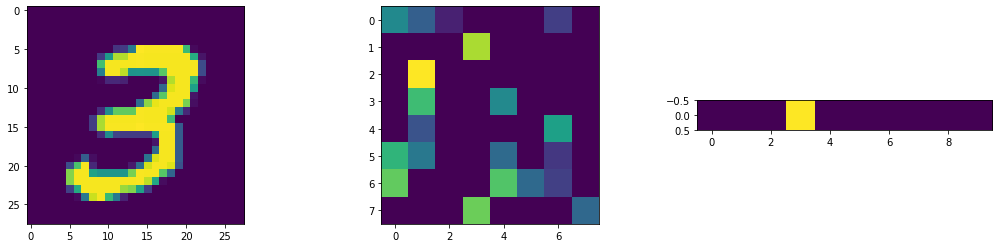

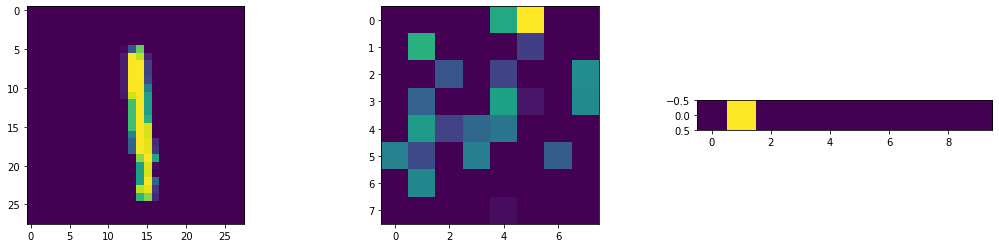

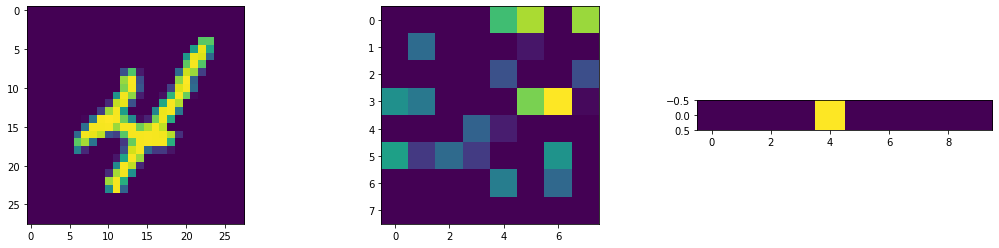

In [12]:
activation_model = tf.keras.Model(
    inputs=model.input,
    outputs=[layer.output for layer in model.layers]
)
x = train_images[:1]
y = activation_model(x)

def play(x):
    plt.figure(figsize=(18, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(x)

    x = tf.reshape(x, (1, 28, 28))
    y = activation_model(x)

    # a = y[2]
    # a = tf.reshape(a, (13, 13, 32))
    # a = tf.transpose(a, (2, 0, 1))
    # c = itertools.count(1)
    # plt.figure(figsize=(18, 8))
    # for image in a:
    #     plt.subplot(4, 8, next(c))
    #     plt.imshow(image)
    # plt.show()
    # 
    # a = y[4]
    # a = tf.reshape(a, (5, 5, 64))
    # a = tf.transpose(a, (2, 0, 1))
    # c = itertools.count(1)
    # plt.figure(figsize=(18, 18))
    # for image in a:
    #     plt.subplot(8, 8, next(c))
    #     plt.imshow(image)
    # plt.show()
    # 
    # a = y[5]
    # a = tf.reshape(a, (3, 3, 64))
    # a = tf.transpose(a, (2, 0, 1))
    # c = itertools.count(1)
    # plt.figure(figsize=(18, 18))
    # for image in a:
    #     plt.subplot(8, 8, next(c))
    #     plt.imshow(image)
    # plt.show()
    # 
    # a = y[6]
    # a = tf.reshape(a, (24, 24))
    # plt.imshow(a)
    # plt.show()

    plt.subplot(1, 3, 2)
    a = y[7]
    a = tf.reshape(a, (8, 8))
    plt.imshow(a)

    plt.subplot(1, 3, 3)
    a = y[8]
    a = tf.reshape(a, (1, 10))
    plt.imshow(a)
    plt.show()

for i in range(10):
    play(train_images[i])

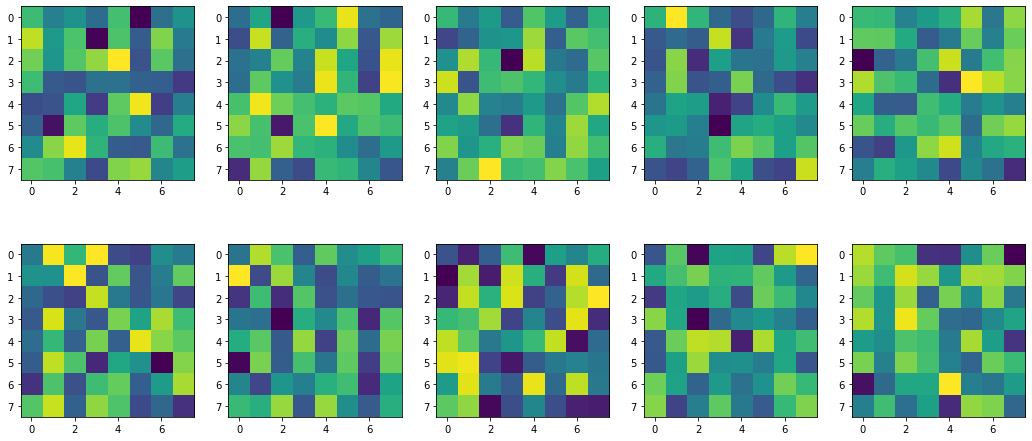

In [13]:
layer = model.layers[-1]
w, b = layer.variables
w = tf.transpose(w, (1, 0))
w = tf.reshape(w, (10, 8, 8))
w.shape
plt.figure(figsize=(18, 8))
c = itertools.count(1)
for v in w:
    plt.subplot(2, 5, next(c))
    plt.imshow(v)

In [14]:
model.save('cnn.h5')
model = create_model()
print(model.evaluate(test_images, test_labels, verbose=0))
model.load_weights('cnn.h5')
print(model.evaluate(test_images, test_labels, verbose=0))

[2.3126002967834474, 0.0687]
[0.04048101488666865, 0.9918]
